# I-HANK model

Variables\
A_hh: Houshold assets deflated with PNT \
A: Houshold assets nominal\
E_hh: Houshold expenditure deflated with PNT \
E: Nominal Houshold expenditure

Parameters follow notation from I-HANK docunemtation.\
New parameters are followed by _



In [63]:
%load_ext autoreload
%autoreload 2

import numpy as npc

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import func 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Share of domestic workers in tradable sector = 0.50
steady state found in 12.7 secs
ss.inc_TH = 0.351
ss.inc_NT = 0.349
par.nu_ = 0.675
par.alphaF = 0.333
par.varphiTH = 0.772
par.varphiNT = 0.772
ss.M_s = 0.167
ss.clearing_YTH =   0.00000000
ss.clearing_YNT =   0.00000000
ss.G = 0.298
ss.NFA = 0.000


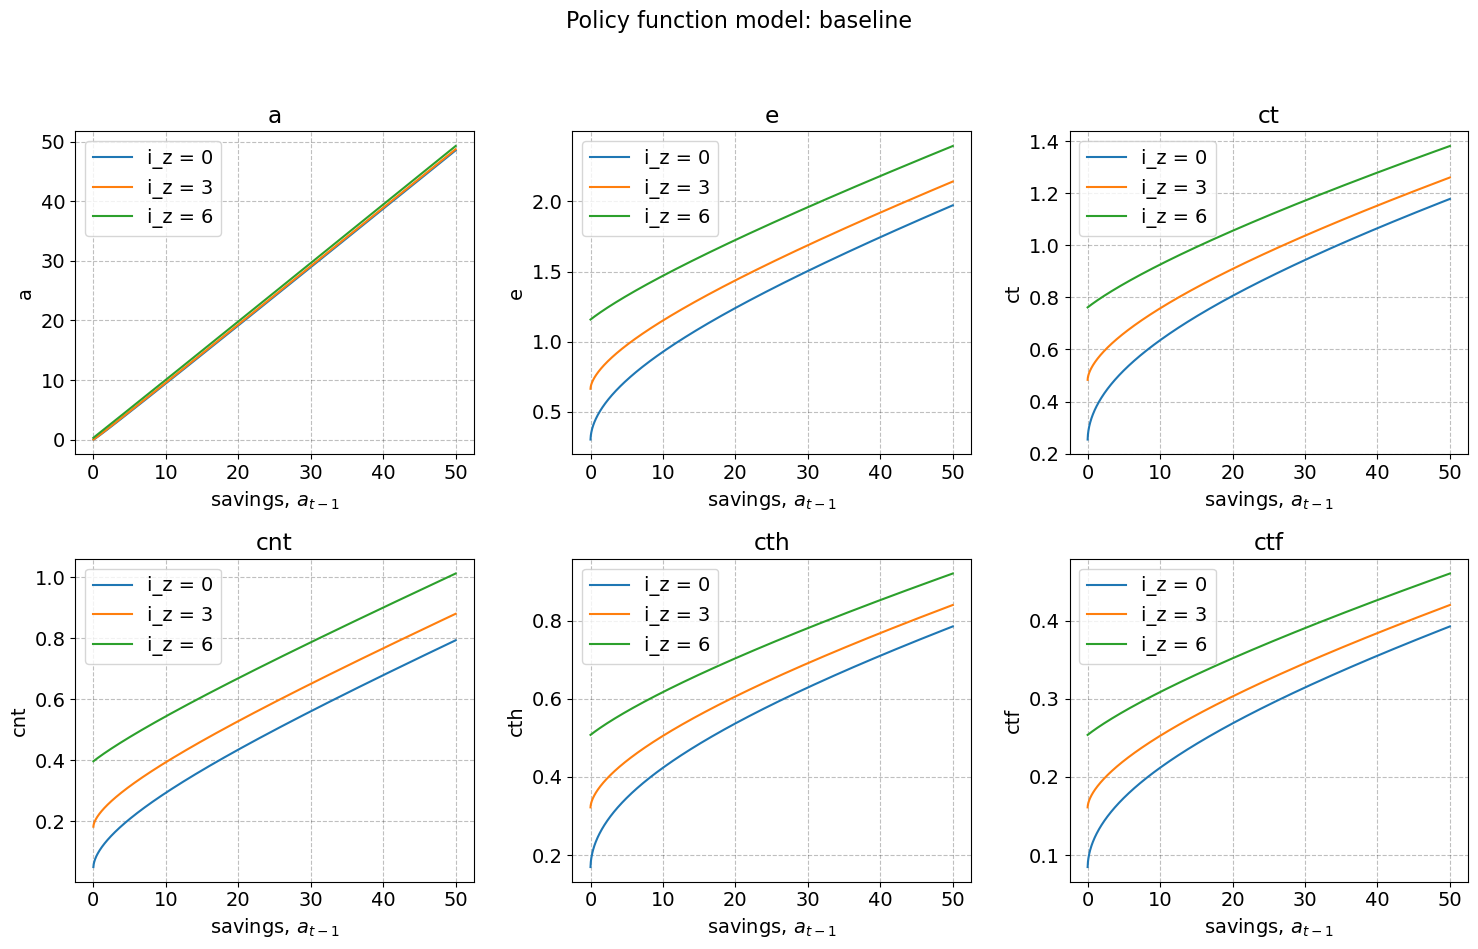

In [64]:
model = IHANKModelClass(name='baseline')
model.find_ss(do_print=True)
func.plot_policy(model, ['a', 'e', 'ct', 'cnt', 'cth', 'ctf'])

Text(0.5, 1.0, 'Non-homothetic expenditure shares')

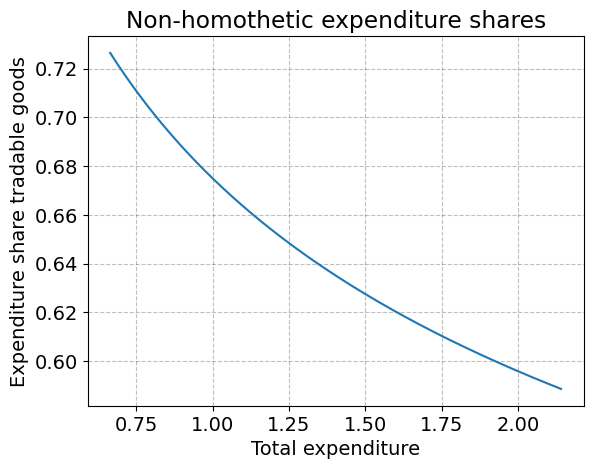

In [65]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
a_ = model.ss.a[0,3,:]*model.ss.PNT
e_ = model.ss.e[0,3,:]*model.ss.PNT
ect_ = model.ss.ct[0,3,:]*model.ss.PT
ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
share_ = ect_/(ecnt_+ect_)

plt.figure()
plt.plot(e_,share_)
plt.xlabel('Total expenditure')
plt.ylabel('Expenditure share tradable goods')
plt.title('Non-homothetic expenditure shares')

note: inputs = steady state value -> expected: constant value (straigt line) in roughly -10^-5 to 10^5

household problem solved along transition path in 0.9 secs
household problem simulated along transition in 0.1 secs



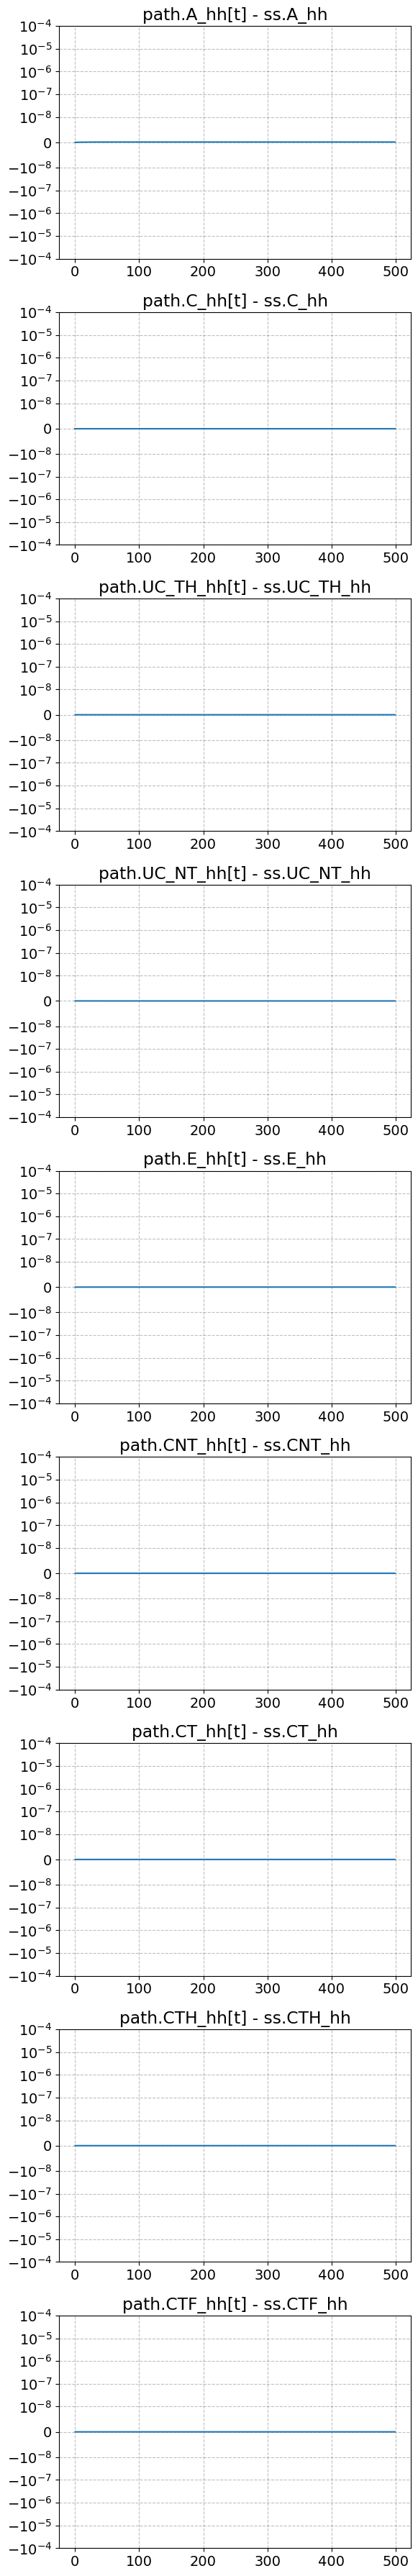

In [66]:
model.test_hh_path()

In [67]:
model.test_ss()

E              :       1.0000
CB             :       1.0000
ZTH            :       1.0000
ZNT            :       1.0000
NTH            :       0.5015
NNT            :       0.4985
piWTH          :       0.0000
piWNT          :       0.0000
YTH            :       0.5015
YNT            :       0.4985
WTH            :       1.0000
WNT            :       1.0000
PTH            :       1.0000
PNT            :       1.0000
PF_s           :       1.0000
PF             :       1.0000
PTH_s          :       1.0000
PT             :       1.0000
P              :       1.0000
pi_F_s         :       0.0000
pi_F           :       0.0000
pi_NT          :       0.0000
pi_TH          :       0.0000
pi_T           :       0.0000
pi             :       0.0000
pi_TH_s        :       0.0000
i              :       0.0050
i_shock        :       0.0000
G              :       0.2984
B              :       0.3287
tau            :       0.3000
inc_TH         :       0.3510
inc_NT         :       0.3490
ra        

In [68]:


model.solve_hh_ss()
model.simulate_hh_ss()

In [69]:
model.ss.CNT_hh - 0.3973666

-0.19720359401278412

In [70]:

model.ss.E_hh*model.ss.PNT-model.ss.CT_hh*model.ss.PT-model.ss.CNT_hh*model.ss.PNT

2.7755575615628914e-17

In [71]:
# model.ss.CNT = 0.20285137772435485
# In block  [0.3973666]

# assert model.ss.CNT_hh == 0.3973666
print(f'{model.ss.CNT_hh-0.3973666:.16f}')

-0.1972035940127841


Everyting before HH post is steady state, so all inpust to the HH problem are steady state values, so the outputs from the HH block should be correct... 

In [73]:
model.test_path()

# cnt = (ex-ct*pt ) / pnt


shocks: ZTH ZNT M_s rF PF_s beta G i_shock 
unknowns: CB NNT NTH piWTH piWNT 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.mon_pol
  E                0.0e+00
 blocks.production
  YTH              0.0e+00
  YNT              0.0e+00
  WTH              0.0e+00
  WNT              0.0e+00
  PTH              0.0e+00
  PNT              0.0e+00
 blocks.prices
  PF               0.0e+00
  PTH_s            0.0e+00
  PT               0.0e+00
  P                0.0e+00
  pi_F_s           0.0e+00
  pi_F             0.0e+00
  pi_NT            0.0e+00
  pi_TH            0.0e+00
  pi_T             0.0e+00
  pi               0.0e+00
  pi_TH_s          0.0e+00
 blocks.central_bank
  i                1.1e-16
 blocks.government
  B                0.0e+00
  tau              0.0e+00
 blocks.HH_pre
  inc_TH           0.0e+00
  inc_NT           0.0e+00
  ra               1.1e-16
  p                0.0e+00
 hh
  A_hh             1.3e-10
  C_hh             0.0e+00
  UC_TH_hh         1.4e-11
  UC_NT_h